In [350]:
import pandas as pd
import pingouin as pg
from pingouin import rm_anova
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_1samp 
%matplotlib inline

### Fixation

In [338]:
fix_anova = pd.read_csv("csv_backup/fix_anova.csv", index_col=0)
fix_anova["log_acc"] = np.log(fix_anova.acc)
fix_anova.var()

/home/shreshth.saxena/.conda/envs/temp/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


acc        10680.393053
log_acc        0.189520
dtype: float64

<AxesSubplot:xlabel='model', ylabel='log_acc'>

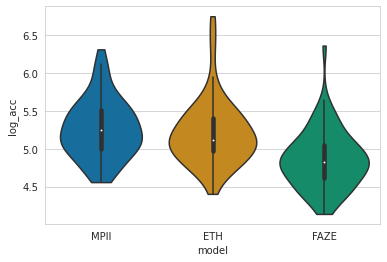

In [339]:
sns.violinplot(x="model", y="log_acc", data = fix_anova, palette=sns.color_palette("colorblind",3), inner='box', cut=0)

In [340]:
rm_anova(data=fix_anova, dv = 'acc', within = "model", subject='subject', detailed = True, effsize = 'n2')

Source             SS   DF            MS          F     p-unc  p-GG-corr  \
0  model  192501.270960    2  96250.635480  13.096799  0.000007   0.000199   
1  Error  940694.049687  128   7349.172263        NaN       NaN        NaN   

         n2       eps sphericity   W-spher       p-spher  
0  0.092906  0.619485      False  0.385755  9.307298e-14  
1       NaN       NaN        NaN       NaN           NaN

In [341]:
print(pg.pairwise_tests(dv='acc', within='model', subject='subject', padjust='bonf', data = fix_anova).to_markdown())

|    | Contrast   | A    | B    | Paired   | Parametric   |         T |   dof | alternative   |       p-unc |      p-corr | p-adjust   |       BF10 |     hedges |
|---:|:-----------|:-----|:-----|:---------|:-------------|----------:|------:|:--------------|------------:|------------:|:-----------|-----------:|-----------:|
|  0 | model      | ETH  | FAZE | True     | True         |  3.69483  |    64 | two-sided     | 0.000457909 | 0.00137373  | bonf       | 52.84      |  0.61378   |
|  1 | model      | ETH  | MPII | True     | True         | -0.319826 |    64 | two-sided     | 0.750142    | 1           | bonf       |  0.143     | -0.0528065 |
|  2 | model      | FAZE | MPII | True     | True         | -9.79424  |    64 | two-sided     | 2.37738e-14 | 7.13215e-14 | bonf       |  3.055e+11 | -0.841153  |


In [ ]:
#ONE SAMPLE TEST WITH EHINGER (

### Zone Classification

In [226]:
zone_anova = pd.read_csv("csv_backup/zone_anova.csv", index_col = 0)
zone_anova.var()

/home/shreshth.saxena/.conda/envs/temp/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


recall    0.068996
dtype: float64

In [227]:
rm_anova(data=zone_anova, dv = 'recall', within = "model", subject='subject', detailed = True, effsize = 'n2')

Source        SS   DF        MS          F         p-unc        n2       eps
0  model  2.142187    2  1.071094  34.445433  1.073993e-12  0.160041  0.972288
1  Error  3.980208  128  0.031095        NaN           NaN       NaN       NaN

In [228]:
print(pg.pairwise_tests(dv='recall', within='model', subject='subject', padjust='bonf', data = zone_anova).to_markdown())

|    | Contrast   | A    | B    | Paired   | Parametric   |         T |   dof | alternative   |       p-unc |      p-corr | p-adjust   |      BF10 |     hedges |
|---:|:-----------|:-----|:-----|:---------|:-------------|----------:|------:|:--------------|------------:|------------:|:-----------|----------:|-----------:|
|  0 | model      | ETH  | FAZE | True     | True         | -7.37618  |    64 | two-sided     | 4.05638e-10 | 1.21692e-09 | bonf       | 2.577e+07 | -0.939858  |
|  1 | model      | ETH  | MPII | True     | True         |  0.345208 |    64 | two-sided     | 0.73107     | 1           | bonf       | 0.144     |  0.0458553 |
|  2 | model      | FAZE | MPII | True     | True         |  7.62646  |    64 | two-sided     | 1.46903e-10 | 4.4071e-10  | bonf       | 6.817e+07 |  0.919298  |


<AxesSubplot:xlabel='model', ylabel='recall'>

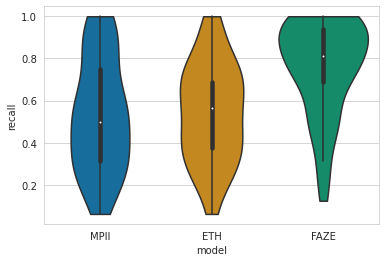

In [229]:
sns.violinplot(x="model", y="recall", data = zone_anova, palette=sns.color_palette("colorblind",3), inner='box', cut=0)

### FreeView

In [44]:
## using avg_fixations as te dependent var
fv_anova_avg_fixations = pd.read_csv("csv_backup/fv_anova_avg_fixations.csv", index_col = 0)
rm_anova(data=fv_anova_avg_fixations, dv = 'avg_fixations', within = "model", subject='subject', detailed = True, effsize = 'n2')

Source          SS   DF          MS          F         p-unc        n2  \
0  model  211.435136    2  105.717568  20.856674  1.444155e-08  0.093299   
1  Error  648.801843  128    5.068764        NaN           NaN       NaN   

        eps  
0  0.980764  
1       NaN

In [45]:
print(pg.pairwise_tests(dv='avg_fixations', within='model', subject='subject', padjust='bonf', data = fv_anova_avg_fixations).to_markdown())

|    | Contrast   | A    | B    | Paired   | Parametric   |        T |   dof | alternative   |       p-unc |      p-corr | p-adjust   |       BF10 |    hedges |
|---:|:-----------|:-----|:-----|:---------|:-------------|---------:|------:|:--------------|------------:|------------:|:-----------|-----------:|----------:|
|  0 | model      | ETH  | FAZE | True     | True         |  2.09643 |    64 | two-sided     | 0.0400024   | 0.120007    | bonf       |      1.051 |  0.286584 |
|  1 | model      | ETH  | MPII | True     | True         | -4.48516 |    64 | two-sided     | 3.09336e-05 | 9.28007e-05 | bonf       |    627.508 | -0.432066 |
|  2 | model      | FAZE | MPII | True     | True         | -6.21951 |    64 | two-sided     | 4.25346e-08 | 1.27604e-07 | bonf       | 305700     | -0.84302  |


In [213]:
# using AUC computed with GT Judd Heatmaps
fv_anova_auc = pd.read_csv("csv_backup/fv_anova_auc.csv", index_col = 0)
fv_anova_auc.var()

/home/shreshth.saxena/.conda/envs/temp/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


avg_AUC    0.010941
dtype: float64

<AxesSubplot:xlabel='model', ylabel='avg_AUC'>

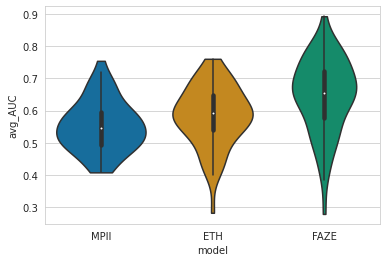

In [214]:
sns.violinplot(x="model", y="avg_AUC", data = fv_anova_auc, palette=sns.color_palette("colorblind",3), inner='box', cut=0)

In [215]:
rm_anova(data=fv_anova_auc, dv = 'avg_AUC', within = "model", subject='subject', detailed = True, effsize = 'n2')

Source        SS   DF        MS         F         p-unc        n2       eps
0  model  0.299574    2  0.149787  20.26161  2.265761e-08  0.141141  0.935679
1  Error  0.946259  128  0.007393       NaN           NaN       NaN       NaN

In [216]:
print(pg.pairwise_tests(dv='avg_AUC', within='model', subject='subject', padjust='bonf', data = fv_anova_auc).to_markdown())

|    | Contrast   | A    | B    | Paired   | Parametric   |        T |   dof | alternative   |       p-unc |      p-corr | p-adjust   |      BF10 |    hedges |
|---:|:-----------|:-----|:-----|:---------|:-------------|---------:|------:|:--------------|------------:|------------:|:-----------|----------:|----------:|
|  0 | model      | ETH  | FAZE | True     | True         | -4.2251  |    64 | two-sided     | 7.72078e-05 | 0.000231623 | bonf       |   269.501 | -0.593363 |
|  1 | model      | ETH  | MPII | True     | True         |  2.33398 |    64 | two-sided     | 0.0227489   | 0.0682466   | bonf       |     1.682 |  0.358798 |
|  2 | model      | FAZE | MPII | True     | True         |  5.61796 |    64 | two-sided     | 4.50765e-07 | 1.3523e-06  | bonf       | 32780     |  0.943186 |


### Smooth Pursuit

In [201]:
sp_anova = pd.read_csv("csv_backup/sp_anova.csv", index_col=0)

In [217]:
sp_anova["log_err"] = np.log(sp_anova.err)
sp_anova.var()

/home/shreshth.saxena/.conda/envs/temp/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


err        300.245006
log_err      0.475061
dtype: float64

<AxesSubplot:xlabel='model', ylabel='log_err'>

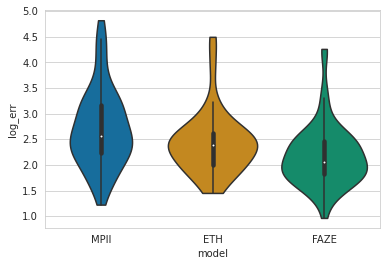

In [ ]:
sns.violinplot(x="model", y="log_err", data = sp_anova, palette=sns.color_palette("colorblind",3), inner='box', cut=0)

In [342]:
rm_anova(data=sp_anova, dv = 'err', within = "model", subject='subject', detailed = True, effsize = 'n2')

Source            SS   DF           MS        F    p-unc  p-GG-corr  \
0  model   3276.866027    2  1638.433014  9.36415  0.00016   0.000502   
1  Error  22395.991661  128   174.968685      NaN      NaN        NaN   

         n2       eps sphericity   W-spher   p-spher  
0  0.056258  0.808882      False  0.763726  0.000205  
1       NaN       NaN        NaN       NaN       NaN

In [344]:
print(pg.pairwise_tests(dv='err', within='model', subject='subject', padjust='bonf', data = sp_anova).to_markdown())

|    | Contrast   | A    | B    | Paired   | Parametric   |        T |   dof | alternative   |       p-unc |      p-corr | p-adjust   |    BF10 |    hedges |
|---:|:-----------|:-----|:-----|:---------|:-------------|---------:|------:|:--------------|------------:|------------:|:-----------|--------:|----------:|
|  0 | model      | ETH  | FAZE | True     | True         |  1.99739 |    64 | two-sided     | 0.0500374   | 0.150112    | bonf       |   0.875 |  0.253696 |
|  1 | model      | ETH  | MPII | True     | True         | -2.34846 |    64 | two-sided     | 0.0219521   | 0.0658564   | bonf       |   1.734 | -0.335186 |
|  2 | model      | FAZE | MPII | True     | True         | -4.1637  |    64 | two-sided     | 9.54582e-05 | 0.000286375 | bonf       | 221.673 | -0.557664 |


### 3x4 ANOVA

In [112]:
sns.set_style("whitegrid")

In [57]:
#Trying robust scaler instead of zscore  
# from sklearn.preprocessing import RobustScaler
# wide_df = pd.concat([fix_anova["acc"], zone_anova["recall"], fv_anova_auc["avg_AUC"], sp_anova["err"]], axis=1)
# trans = RobustScaler()
# temp_df = pd.DataFrame(trans.fit_transform(wide_df), columns = ["Fixation", "Zone_Classification", "Free_Viewing", "Smooth_Pursuit"])
# plt.figure(figsize=(16,8))
# sns.violinplot(data=temp_df)

In [317]:
from scipy.stats import zscore
# from scipy.stats import median_absolute_deviation

fix_anova["score"] = zscore(fix_anova["acc"]) #Lower Auccuracy value is better
zone_anova["score"] = zscore(-1*zone_anova["recall"])  #higher Recall value is better
fv_anova_auc["score"] = zscore(-1*fv_anova_auc["avg_AUC"]) #higher AUC value is better
sp_anova["score"] = zscore(sp_anova["err"]) #Lower error is better

In [318]:
long_df = pd.concat([fix_anova[["model", "subject", "score"]],
                  zone_anova[["model", "subject", "score"]],
                  fv_anova_auc[["model", "subject", "score"]],
                 sp_anova[["model", "subject", "score"]]],
           keys=["Fixation", "Zone_Classification", "FreeView", "Smooth_Pursuit"], names=["task"]).reset_index()
long_df = long_df.drop("level_1", axis = 1)

# long_df = long_df[abs(long_df.score)<3] #Thresholding to 3 std, comment to disable

In [311]:
# long_df["score"] = long_df.score.clip(-3,3)

In [115]:
ProfileReport(long_df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

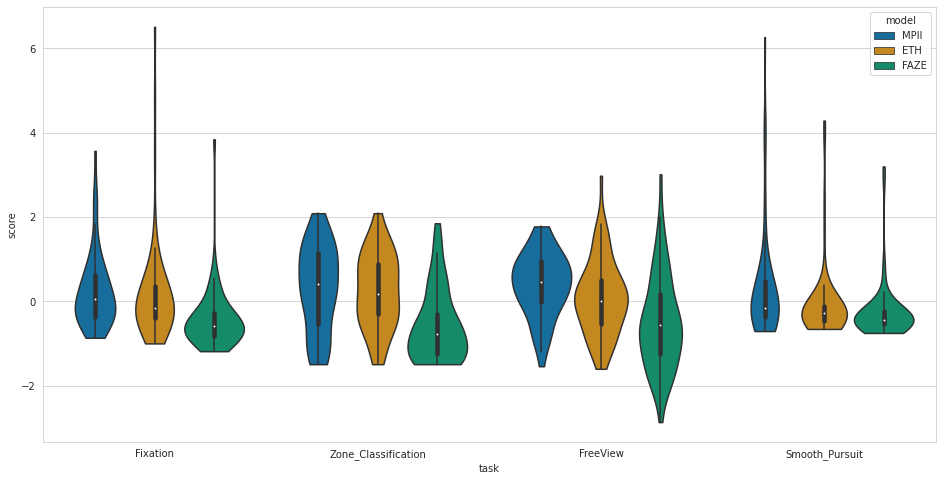

In [319]:
plt.figure(figsize=(16,8))
sns.violinplot(x="task", y="score", hue="model", data = long_df, palette=sns.color_palette("colorblind",3), inner='box', cut=0)
plt.savefig("anova_task_model_transformed.png", dpi=300)

<AxesSubplot:xlabel='model', ylabel='score'>

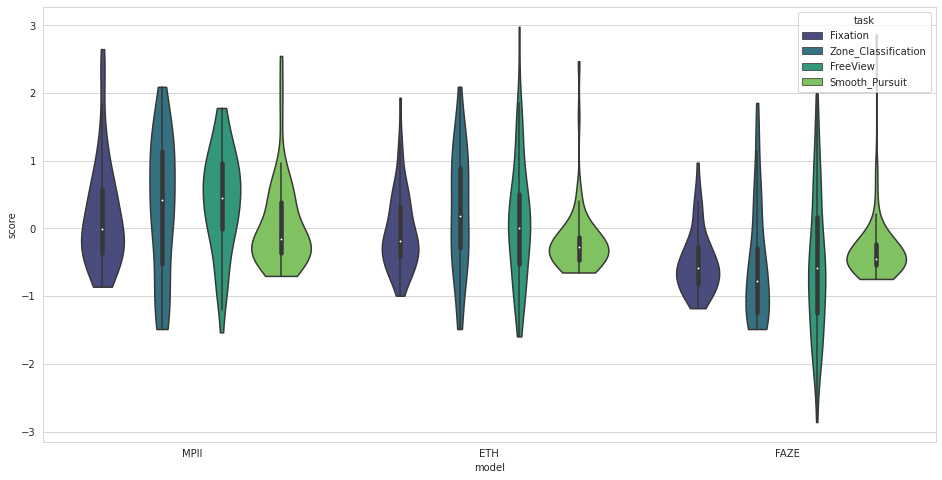

In [129]:
plt.figure(figsize=(16,8))
sns.violinplot(x="model", y="score", hue="task", data = long_df, palette=sns.color_palette("viridis",4), inner='box', cut=0)
# plt.savefig("anova_models.png", dpi=300)

<AxesSubplot:xlabel='model', ylabel='score'>

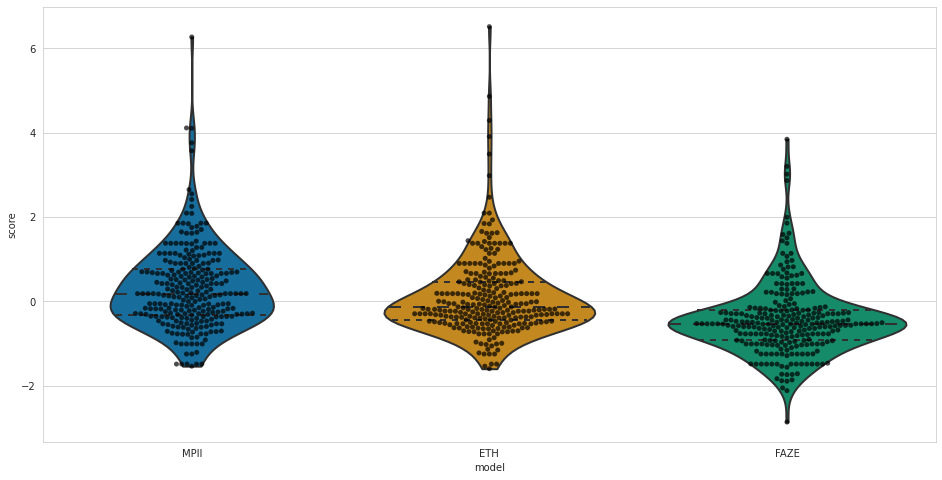

In [308]:
plt.figure(figsize=(16,8))
sns.violinplot(x="model", y="score",  data = long_df, inner="quartile",  cut=0, palette= sns.color_palette("colorblind",3), linewidth=2)
sns.swarmplot(x="model", y="score",  data = long_df, color="black", alpha=0.7)

In [320]:
rm_anova(data=long_df, dv = 'score', within = ["task","model"], subject='subject', detailed = True, effsize = 'np2')

/home/shreshth.saxena/.conda/envs/temp/lib/python3.7/site-packages/pingouin/distribution.py:487: UserWarning: Epsilon values might be innaccurate in two-way repeated measures design where each  factor has more than 2 levels. Please  double-check your results.
  "Epsilon values might be innaccurate in "


Source            SS  ddof1  ddof2            MS             F  \
0          task  3.116407e-29      3    192  1.038802e-29  1.282101e-29   
1         model  7.991714e+01      2    128  3.995857e+01  4.625655e+01   
2  task * model  7.900429e+00      6    384  1.316738e+00  2.555543e+00   

          p-unc     p-GG-corr           np2       eps  
0  1.000000e+00  1.000000e+00  2.003283e-31  0.979251  
1  7.614441e-16  9.364339e-15  4.195356e-01  0.918863  
2  1.939615e-02  3.869021e-02  3.839714e-02  0.674984

In [321]:
print(pg.pairwise_tests(dv='score', within=['model','task'], subject='subject', padjust='bonf', data = long_df).to_markdown())

|    | Contrast     | model   | A              | B                   | Paired   | Parametric   |             T |   dof | alternative   |       p-unc |      p-corr | p-adjust   |      BF10 |       hedges |
|---:|:-------------|:--------|:---------------|:--------------------|:---------|:-------------|--------------:|------:|:--------------|------------:|------------:|:-----------|----------:|-------------:|
|  0 | model        | -       | ETH            | FAZE                | True     | True         |   7.29826     |    64 | two-sided     | 5.56357e-10 | 1.66907e-09 | bonf       | 1.905e+07 |  0.878374    |
|  1 | model        | -       | ETH            | MPII                | True     | True         |  -2.08061     |    64 | two-sided     | 0.0414777   | 0.124433    | bonf       | 1.02      | -0.284108    |
|  2 | model        | -       | FAZE           | MPII                | True     | True         | -10.2552      |    64 | two-sided     | 3.87273e-15 | 1.16182e-14 | bonf       | 1.

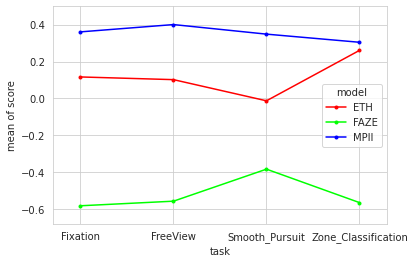

In [253]:
from statsmodels.graphics.factorplots import interaction_plot
interaction_plot(long_df["task"], long_df["model"], long_df["score"])
plt.show()

### Blinks

In [345]:
blinks_anova = pd.read_csv("csv_backup/blinks_anova.csv", index_col = 0)

In [346]:
blinks_anova = blinks_anova[blinks_anova.avg_blinks_per_trial > 0]
blinks_anova["log_avg_blinks_per_trial"] = np.log(blinks_anova["avg_blinks_per_trial"])
blinks_anova.var()

/home/shreshth.saxena/.conda/envs/temp/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


avg_blinks_per_trial        2.021278
log_avg_blinks_per_trial    0.091736
dtype: float64

<AxesSubplot:xlabel='factor', ylabel='avg_blinks_per_trial'>

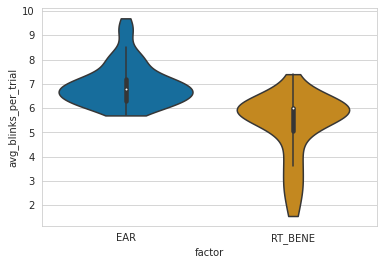

In [348]:
sns.violinplot(x="factor", y="avg_blinks_per_trial", data = blinks_anova, palette=sns.color_palette("colorblind",3), inner='box', cut=0)

In [349]:
#ANOVA
rm_anova(data=blinks_anova, dv = "avg_blinks_per_trial", within = "factor", subject='subject', detailed = True, effsize = 'n2')

Source          SS  DF         MS          F         p-unc        n2  eps
0  factor   91.336205   1  91.336205  54.721426  4.799347e-10  0.362909  1.0
1   Error  101.815850  61   1.669112        NaN           NaN       NaN  NaN

In [286]:
print(pg.pairwise_tests(dv="avg_blinks_per_trial", within='factor', subject='subject', padjust='bonf', data = blinks_anova).to_markdown())

|    | Contrast   | A   | B       | Paired   | Parametric   |       T |   dof | alternative   |       p-unc |      BF10 |   hedges |
|---:|:-----------|:----|:--------|:---------|:-------------|--------:|------:|:--------------|------------:|----------:|---------:|
|  0 | factor     | EAR | RT_BENE | True     | True         | 7.39739 |    61 | two-sided     | 4.79935e-10 | 2.208e+07 |  1.48804 |


In [ ]:
# log transform only for SP and Fixation
# clip vs threshold for zscore


In [327]:
blinks_anova.groupby("factor").mean()

avg_blinks_per_trial  log_avg_blinks_per_trial
factor                                                 
EAR                  6.994725                  1.938108
RT_BENE              5.285125                  1.616566